In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Kuliah/RekayasaDataTerapan/UTS

/content/drive/MyDrive/Kuliah/RekayasaDataTerapan/UTS


step mengolah data NLP (Natural Language Processing) untuk implementasi program python 
1. Import Library (beberapa library sangat membantu mengolah data seperti pandas dataframe)
2. Load Data pada Python (memasukkan data pada compiler python untuk dilakukan proses pengolahan data NLP)
3. Data Identification (Identifikasi tipe data dan size data sebelum diolah oleh compiler python)
4. Preprocessing Data (Pengolahan data awal sebelum diolah oleh machine learning agar proses pembelajaran lebih baik) Pre processing meliputi cleaning text (pembersihan kata/huruf/angka yang tidak penting) dan Tokenization (Proses pemisahan kata-kata) dan Lemmatization (proses penyederhanaan kata dengan arti yang sama tetapi memiliki penulisan yang berbeda sedikit seperti kata imbuhan, perubahan kata kerja,dll)
5. Feature Extraction (proses ekstraksi feature-feature yang dimiliki oleh input yang sangat membantu proses klasifikasi NLP)
6. Splitting Data (proses pembagian data training dan data testing untuk kebutuhan pembelajaran dan pengetesan machine leanrning)
7. Building Model for Classification (Pemilihan algoritma klasifikasi yang digunakan untuk penyelesaian problem klasifikasi dan proses pembuatan model dengan fitting antara feature dan class)
8. Evaluasi Model (Hasil Analisis dari data yang didapatkan melalui pembangunan model pada proses klasifikasi apakah hasilnya akurat untuk problem klasifikasi dengan melihat clasification report dan confusion matrix. jika hasil tidak memuaskan maka dapat menggunakan algoritma klasifikasi yang lain)
9. END


In [1]:
# import library
import numpy as np
import re
from google.colab import files 
import io 
import pandas as pd
from sklearn.model_selection import train_test_split
import csv
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn import metrics
import seaborn as sns
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# upload file
uploaded = files.upload() 
# Store dataset with panda dataframe
corpus = pd.read_csv(io.BytesIO(uploaded['1000datadongeng.csv']))

KeyError: ignored

In [ ]:
# Load data to python
# Store dataset with panda dataframe
corpus = pd.read_csv('1000datadongeng.csv',)
corpus.columns=['Text','Class']
#extract information about data type and size
corpus.info()
corpus.shape
corpus

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    999 non-null    object
 1   Class   999 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


,Text,Class
0,Pangeran Empang Kuala murka mendengar pinangan...,marah
1,Bujang Kelana akan menantang Pendekar Katung u...,marah
2,Pendekar Katung yang tidak terima dengan kekal...,marah
3,Ibunya sangat marah. ‘’ Dasar bodoh! Baju kesa...,marah
4,"Akhirnya karena merasa kesal, setelah lima har...",marah
...,...,...
994,"Akan tetapi, ia dan rombongan terkejut sebab d...",terkejut
995,"Mendengar hal itu, Halimah sangat kaget dan te...",terkejut
996,Ketika aku memperhatikan domba-domba yang seda...,terkejut
997,Pada suatu hari beliau duduk di gua Hira dan t...,terkejut


preprocessing data (cleaning dan tokenize text) (lemmatization for indonesia language not supported)

In [ ]:
#make clean text function
def Clean(Text):
    clean = re.sub('[^a-zA-Z]', ' ', Text) 
    clean = clean.lower()
    clean = clean.split()
    clean = ' '.join(clean)
    return clean
#cleaning text
corpus["Clean_Text"] = corpus["Text"].apply(Clean)
corpus["Clean_Text"]

0      pangeran empang kuala murka mendengar pinangan...
1      bujang kelana akan menantang pendekar katung u...
2      pendekar katung yang tidak terima dengan kekal...
3      ibunya sangat marah dasar bodoh baju kesayanga...
4      akhirnya karena merasa kesal setelah lima hari...
                             ...                        
994    akan tetapi ia dan rombongan terkejut sebab di...
995    mendengar hal itu halimah sangat kaget dan ter...
996    ketika aku memperhatikan domba domba yang seda...
997    pada suatu hari beliau duduk di gua hira dan t...
998    isterinya dikagetkan dengan kepucatan wajah be...
Name: Clean_Text, Length: 999, dtype: object

In [ ]:
#Tokenization process to seperate word from sentence
corpus["Tokenize_Text"]=corpus.apply(lambda row: nltk.word_tokenize(row["Clean_Text"]), axis=1)
corpus["Tokenize_Text"]

0      [pangeran, empang, kuala, murka, mendengar, pi...
1      [bujang, kelana, akan, menantang, pendekar, ka...
2      [pendekar, katung, yang, tidak, terima, dengan...
3      [ibunya, sangat, marah, dasar, bodoh, baju, ke...
4      [akhirnya, karena, merasa, kesal, setelah, lim...
                             ...                        
994    [akan, tetapi, ia, dan, rombongan, terkejut, s...
995    [mendengar, hal, itu, halimah, sangat, kaget, ...
996    [ketika, aku, memperhatikan, domba, domba, yan...
997    [pada, suatu, hari, beliau, duduk, di, gua, hi...
998    [isterinya, dikagetkan, dengan, kepucatan, waj...
Name: Tokenize_Text, Length: 999, dtype: object

In [ ]:
# extract input and target from dataframe
x=corpus["Clean_Text"]
y=corpus.Class

In [ ]:
#splitting data train and data test
#print data train and data test to csv format
x_train_text,x_test_text,y_train_text,y_test_text=train_test_split(x,y,test_size=0.2)
data_train_text_x = pd.DataFrame(x_train_text)
data_train_text_y = pd.DataFrame(y_train_text)
data_train_text = pd.concat([data_train_text_x, data_train_text_y], axis=1)
data_train_text.to_csv('Suryadi_Train_text.csv')
data_test_text_x = pd.DataFrame(x_test_text)
data_test_text_y = pd.DataFrame(y_test_text)
data_test_text = pd.concat([data_test_text_x, data_test_text_y], axis=1)
data_test_text.to_csv('Suryadi_Test_text.csv')

In [ ]:
# feature extraction with TF-IDF Vectorizer
# TF-IDF Vectorizer object
tfidf_vectorizer = TfidfVectorizer()
# Values matrix TF-IDF
values = tfidf_vectorizer.fit_transform(x).toarray()
#extract feature name from TF-IDF
feature_names = tfidf_vectorizer.get_feature_names()
#show TF-IDF in dataframe
TF_IDF = pd.DataFrame(values, columns = feature_names)
TF_IDF
#referensi tugas kuliah

,abang,abdib,abdih,abdillah,abrahah,abrahahh,abu,acara,ada,adalah,adanya,adik,adiknya,adu,aduh,aduhai,aduhh,agak,agar,agung,ah,aia,air,aja,ajaib,ajakan,ajeng,aji,aka,akal,akan,akbar,akhirnya,aki,akibat,akibatnya,akim,aksi,aku,akulah,...,umpanku,undangan,unta,untuk,untung,upacara,usir,usus,utbah,utusan,wah,wahai,wajah,wajahku,wajahmu,wajahnya,waktu,waktunya,walau,walaupun,wanan,wangi,wanita,warga,waspada,watuwe,wayungyang,wedana,wilayah,wire,wujud,wujudmu,wungu,wush,ya,yakin,yang,yatim,yorkshire,yuyu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.218599,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.224019,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.198650,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.110697,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.214162,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.161275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.145207,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.165846,0.0,0.0,0.0
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.323189,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.267370,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0

In [ ]:
#Feature extraction result
x = values
print(y)
#Change Classification text to number
class_encoder = LabelEncoder()
y_label = class_encoder.fit_transform(y)
#class_encoder.inverse_transform(['marah','jijik','takut','senang','sedih','terkejut']
print(y_label)

0         marah
1         marah
2         marah
3         marah
4         marah
         ...   
994    terkejut
995    terkejut
996    terkejut
997    terkejut
998    terkejut
Name: Class, Length: 999, dtype: object
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3

In [ ]:
#splitting data train and data test
#print data train and data test to csv format
x_train,x_test,y_train,y_test=train_test_split(x,y_label,test_size=0.2)
data_train_x = pd.DataFrame(x_train)
data_train_y = pd.DataFrame(y_train)
data_train = pd.concat([data_train_x, data_train_y], axis=1)
data_train.to_csv('Suryadi_Train.csv')
data_test_x = pd.DataFrame(x_test)
data_test_y = pd.DataFrame(y_test)
data_test = pd.concat([data_test_x, data_test_y], axis=1)
data_test.to_csv('Suryadi_Test.csv')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.29      1.00      0.44        10
           2       0.63      0.79      0.70        34
           3       1.00      0.44      0.61       127
           4       0.25      1.00      0.40         5
           5       0.53      0.88      0.66        24

    accuracy                           0.59       200
   macro avg       0.45      0.69      0.47       200
weighted avg       0.83      0.59      0.62       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


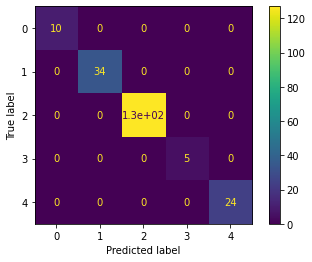

In [ ]:
#Naive Bayes Multinomial
nb = MultinomialNB()
nb.fit(x_train,y_train)
y_pred_nb = nb.predict(x_test)
#show classification report and confusion matrix
print(classification_report(y_pred_nb,y_test))
plot_confusion_matrix(nb,x_test,y_pred_nb)

              precision    recall  f1-score   support

       jijik       0.33      0.67      0.44         3
       marah       0.37      0.38      0.38        34
       sedih       0.63      0.52      0.57        52
      senang       0.55      0.57      0.56        54
       takut       0.40      0.35      0.37        23
    terkejut       0.47      0.56      0.51        34

    accuracy                           0.50       200
   macro avg       0.46      0.51      0.47       200
weighted avg       0.51      0.50      0.50       200



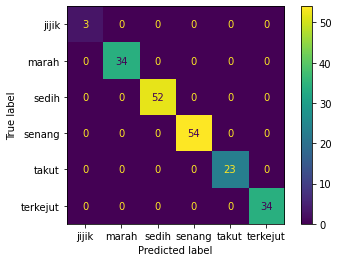

In [ ]:
#Naive Bayes Gaussian
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
#show classification report and confusion matrix
print(classification_report(y_pred_gnb,y_test,target_names=['jijik','marah','sedih','senang','takut','terkejut']))
plot_confusion_matrix(gnb,x_test,y_pred_gnb,display_labels=['jijik','marah','sedih','senang','takut','terkejut'])

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       1.00      0.28      0.43       200
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0

    accuracy                           0.28       200
   macro avg       0.17      0.05      0.07       200
weighted avg       1.00      0.28      0.43       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


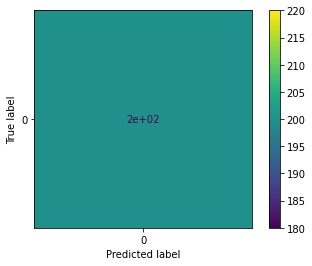

In [ ]:
#Naive Bayes Categorical
cnb = CategoricalNB()
cnb.fit(x_train,y_train)
y_pred_cnb = cnb.predict(x_test)
#show classification report and confusion matrix
print(classification_report(y_pred_cnb,y_test))
plot_confusion_matrix(cnb,x_test,y_pred_cnb)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.12      1.00      0.22         4
           2       0.74      0.81      0.78        32
           3       0.98      0.38      0.55       141
           4       0.19      1.00      0.31         5
           5       0.40      1.00      0.57        18

    accuracy                           0.54       200
   macro avg       0.41      0.70      0.41       200
weighted avg       0.85      0.54      0.58       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


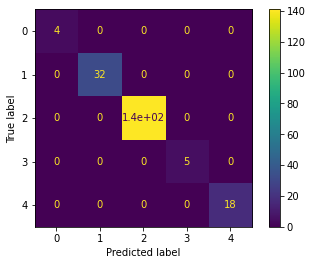

In [ ]:
#Naive Bayes Bernoulli
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred_bnb = bnb.predict(x_test)
#show classification report and confusion matrix
print(classification_report(y_pred_bnb,y_test))
plot_confusion_matrix(bnb,x_test,y_pred_bnb)

Pada percobaan diatas dapat dilihat penggunaan 4 jenis algoritma klasifikasi yaitu Naive Bayes Multinomial, Naive Bayes Gaussian, Naive Bayes Categorical, Naive Bayes Bernoulli. Semua klasifikasi diatas adalah salah satu jenis klasifikasi berbasis probabilitas yaitu naive bayes.

Hasil Analisis Data :
1. 2 tipe data yaitu data table dan confusion matrix. Data tabel ada precision recall f1-score support. 
precision = tp / (tp + fp); tp=true positive, fp = false positive
recall = tp / (tp + fn); tp=true positive, fn = false negative
f-beta score = weight harmonic mean. beta = 1 means precision and recall equally important
Support = the number of occurance of each class

Confusion_matrix = show the number of true prediction of machine learning for each class

2. Dari ke-4 algoritma classifier yang sudah dicoba dapat dilihat dari confusion matrix bahwa semakin tinggi angka maka semakin bagus pula hasil prediksi machine learning. Masing-masing classifier memiliki kelebihannya masing-masing untuk mengkategorikan class tertentu. seperti Naive Bayes Multinomial sangat cocok dipakai untuk klasifikasi kalimat class 3.

3. Dari ke-4 algoritma classifier yang sudah dicoba dapat dilihat dari tabel data bahwa presisi atau tingkat keakuratan machine learning ini dapat memprediksi suatu kelas berbeda-beda. semakin tinggi tingkat keakuratan maka semakin baik machine learning dalam memprediksi. seperti contoh pada naive bayes gaussian memiliki tingkat presisi yang lebih merata kepada semua class sehingga machine learning ini sangat handal dalam mengklasifikasikan hampir semua class kecuali class 0 dibandingkan machine learning dengan algoritma classifier yang lain.

4. pada hampir semua kasus dapat terlihat bahwa class 2 dan class 3 memiliki tingkat presisi dan recall yang sangat bagus di hampir semua machine learning dan untuk class 0 merupakan kelas dengan tingkat presisi dan recall paling kecil.Hal ini memanandakan bahwa Class 0 merupakan class yang paling sulit diklasifikasikan oleh machine learning algoritma classifier lainnya.